In [1]:
import errno
import os

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler

plt.rcParams['font.family'] = 'D2Coding'

In [2]:
p = 'D:/LiTech/LiData/libsta.go.kr/2019년 공공도서관 데이터_시스템반영용.xlsx'

if not os.path.exists(p):
    raise FileNotFoundError(
                errno.ENOENT, os.strerror(errno.ENOENT), p)

df = pd.read_excel(p, header=[0, 1], skipfooter=13)

In [3]:
df

도서관 기본정보                                                           \
           순번       구분  지역   지역_시군구 설립주체                 설립주체_기관명 운영방식   
0           1  공공(어린이)  대전       서구  지자체                대전광역시 서구청   직영   
1           2   공공(일반)  경기  성남시 분당구  지자체                      성남시   직영   
2           3   공공(일반)  서울      종로구   사립  4.19민주혁명회, 4.19혁명희생자유족회   직영   
3           4   공공(일반)  서울      구로구   사립               오류1동 새마을금고   직영   
4           5   공공(일반)  서울       중구   사립               (재)한국대학봉사회   직영   
...       ...      ...  ..      ...  ...                      ...  ...   
1091     1092   공공(일반)  서울      은평구  지자체                     은평구청   위탁   
1092     1093   공공(일반)  서울      노원구  지자체                      NaN   직영   
1093     1094   공공(일반)  서울      노원구  지자체                     노원구청   직영   
1094     1095   공공(일반)  서울      중랑구  지자체                     중랑구청   위탁   
1095     1096   공공(일반)  서울      종로구  지자체                     종로구청   직영   

                                        ... 7. 지식정보취약계층 및 어린이서비스              \
                   운영기관명    분관내용  개관년도  ...           지식취약_예산_노인 지식취약_예산_다문화   
0                 대전시서구청     NaN  2008  ...                    0        1440   
1                    NaN  무지개도서관  2008  ...                 3800           0   
2     4.19민주혁명회 및 희생자유족회     NaN  2000  ...                    0           0   
3              오류1동새마을금고     NaN  1978  ...                    0           0   
4             (재)한국대학봉사회     NaN  1964  ...                    0           0   
...                  ...     ...   ...  ...                  ...         ...   
1091          사단법인 더불어배움     NaN  2018  ...                 1765        7241   
1092                 NaN     NaN  2018  ...                    0           0   
1093                 NaN     NaN  2018  ...                    0           0   
1094           중랑구시설관리공단     NaN  2018  ...                    0           0   
1095                 NaN     NaN  2018  ...                    0           0   

                                                 8. 전자서비스              \
     어린이실_유무 어린이실_이용자수 어린이실_인쇄자료수 어린이실_연간증가자료수 메타데이터_도서자료 메타데이터_연속간행물   
0        NaN       NaN        NaN          NaN      54017           0   
1          유  240500.0    82566.0       4733.0     224174        1405   
2          유       9.0     3199.0        250.0      49552          60   
3          무       0.0        0.0          0.0      56912           0   
4          유       0.0        0.0          0.0          0           0   
...      ...       ...        ...          ...        ...         ...   
1091       유   48818.0     4340.0       4340.0          0           0   
1092       무     482.0     4126.0          0.0      12739           0   
1093       유     168.0      463.0          0.0       7078           0   
1094       유   11257.0     4607.0       4607.0       9750           0   
1095       유       8.0     2357.0       2357.0       4416           0   

                         
     메타데이터_비도서 메타데이터_기타  
0         3315        0  
1         6717        0  
2         1364        0  
3          345        0  
4            0        0  
...        ...      ...  
1091         0        0  
1092         0        0  
1093       262        0  
1094         0     1050  
1095         0      600  

[1096 rows x 231 columns]

In [4]:
#df.tail(15)

In [5]:
#df = df[:1096]

In [6]:
#df.tail()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Columns: 231 entries, (도서관 기본정보, 순번) to (8. 전자서비스, 메타데이터_기타)
dtypes: float64(7), int64(182), object(42)
memory usage: 1.9+ MB


In [8]:
df['도서관 기본정보'].columns.values

array(['순번', '구분', '지역', '지역_시군구', '설립주체', '설립주체_기관명', '운영방식', '운영기관명',
       '분관내용', '개관년도', '도서관명', '우편번호', '주소', '상세주소', '전화번호', '팩스', '홈페이지',
       '개관시간', '휴관일', '도서관구성', '상위본관명', '분류체계', '목록규칙_국내서', '목록규칙_국외서',
       '저자기호_국내서', '저자기호_국외서'], dtype=object)

In [9]:
name = df[('도서관 기본정보', '도서관명')]
name

0            서구어린이도서관
1            성남시구미도서관
2       4.19 혁명기념 도서관
3               오류도서관
4             한국학생도서관
            ...      
1091      내를건너서숲으로도서관
1092      한내지혜의 숲 도서관
1093          향기나무도서관
1094          양원숲속도서관
1095      어린이청소년국학도서관
Name: (도서관 기본정보, 도서관명), Length: 1096, dtype: object

In [10]:
df = df.set_index(name)

In [11]:
df['2. 소장자료']

,도서_국내_총류,도서_국내_철학,도서_국내_종교,도서_국내_사회과학,도서_국내_순수과학,도서_국내_기술과학,도서_국내_예술,도서_국내_언어,도서_국내_문학,도서_국내_역사,...,도서자료_연간제적,비도서_연간구입,비도서_연간기증,비도서_연간제적,전자자료_연간구입,전자자료_연간기증,전자자료_연간제적,연속간행물_연간구입,연속간행물_연간기증,연속간행물_연간제적
"(도서관 기본정보, 도서관명)",,,,,,,,,,,,,,,,,,,,,
서구어린이도서관,2665,1172,482,7003,6606,1137,1079,2648,26334,4891,...,0,209,0,0,0,0,0,0,0,0
성남시구미도서관,12129,10932,7599,41947,13577,14920,10270,8270,64099,18047,...,14952,505,0,4,1500,0,0,128,0,120
4.19 혁명기념 도서관,4521,2372,1374,10958,2236,3930,2434,2104,14345,15604,...,0,0,5,0,0,0,0,0,0,0
오류도서관,3467,3876,2568,12563,2077,4655,4632,2107,15329,5638,...,0,0,0,0,0,0,0,0,0,0
한국학생도서관,480,150,840,1870,480,260,250,75,5359,780,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
내를건너서숲으로도서관,543,642,121,1581,562,938,483,123,6774,733,...,0,0,0,0,0,0,0,57,0,0
한내지혜의 숲 도서관,347,782,216,1714,747,663,302,130,6813,1025,...,0,0,0,0,0,0,0,0,0,0
향기나무도서관,252,653,69,1270,965,817,374,89,1924,665,...,0,112,0,0,0,0,0,0,0,0


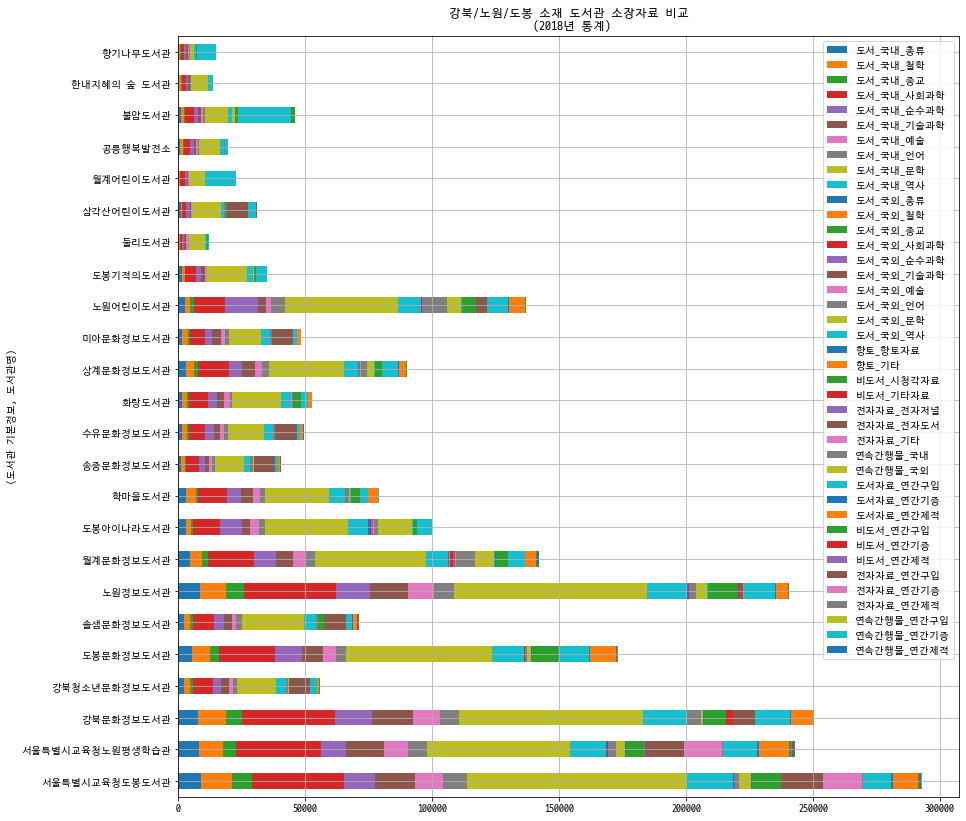

In [68]:
df[df[('도서관 기본정보', '지역_시군구')].isin(['도봉구', '노원구', '강북구'])]['2. 소장자료']           \
    .plot.barh(stacked=True, figsize=(14,14), grid=True, title='강북/노원/도봉 소재 도서관 소장자료 비교\n (2018년 통계)')

In [50]:
kmeans = KMeans(init='k-means++', n_clusters=150, n_init=10)
kmeans.fit(RobustScaler().fit(df['2. 소장자료'].values))
labels = kmeans.labels_

In [51]:
pd.Series(labels).value_counts()

45     53
20     53
27     43
107    36
4      35
       ..
73      1
148     1
30      1
114     1
149     1
Length: 150, dtype: int64

In [52]:
kmeans.cluster_centers_.shape

(150, 41)

In [53]:
df.shape

(1096, 231)

In [54]:
group = pd.DataFrame({'label':labels}, index=df.index)

In [55]:
group

,label
"(도서관 기본정보, 도서관명)",
서구어린이도서관,4
성남시구미도서관,125
4.19 혁명기념 도서관,95
오류도서관,95
한국학생도서관,27
...,...
내를건너서숲으로도서관,12
한내지혜의 숲 도서관,27
향기나무도서관,12


In [56]:
group.sort_values(by='label', inplace=True)


In [57]:
group.to_csv('library_groups.csv', encoding='utf-8')

In [58]:
group = group.merge(df['2. 소장자료'], right_index=True, left_index=True)
group.sort_values(by='label', inplace=True)

In [59]:
group.to_csv('library_groups_w_data.csv', encoding='utf-8')

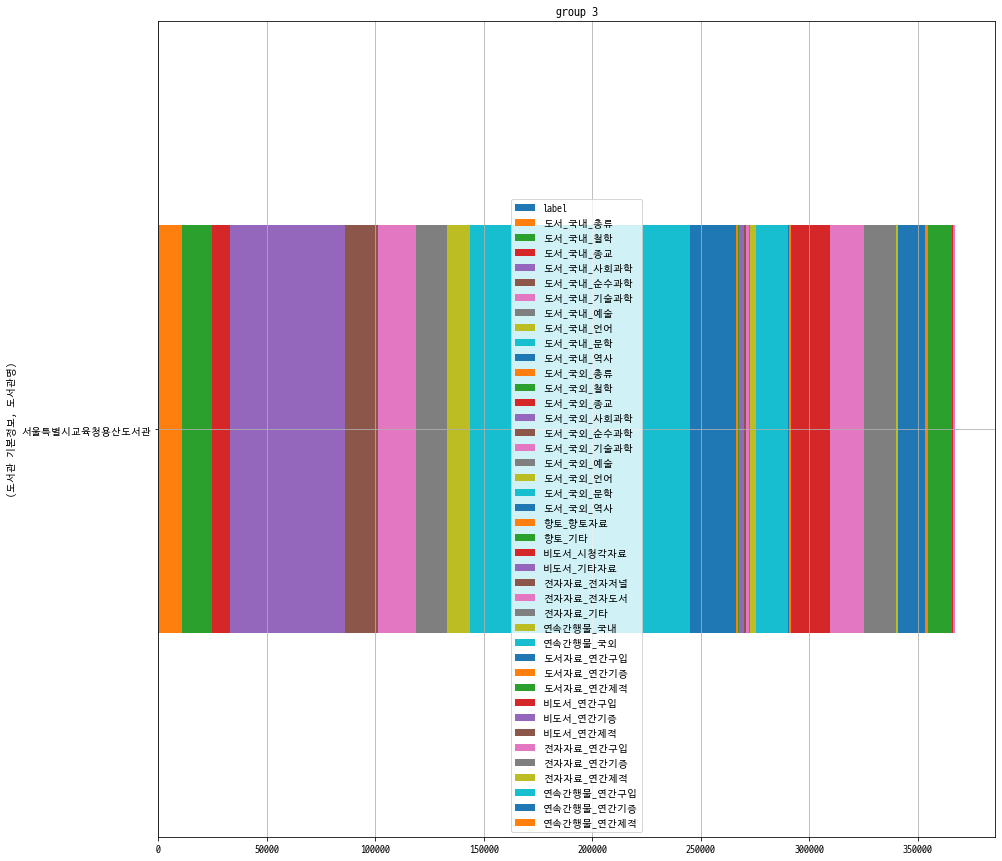

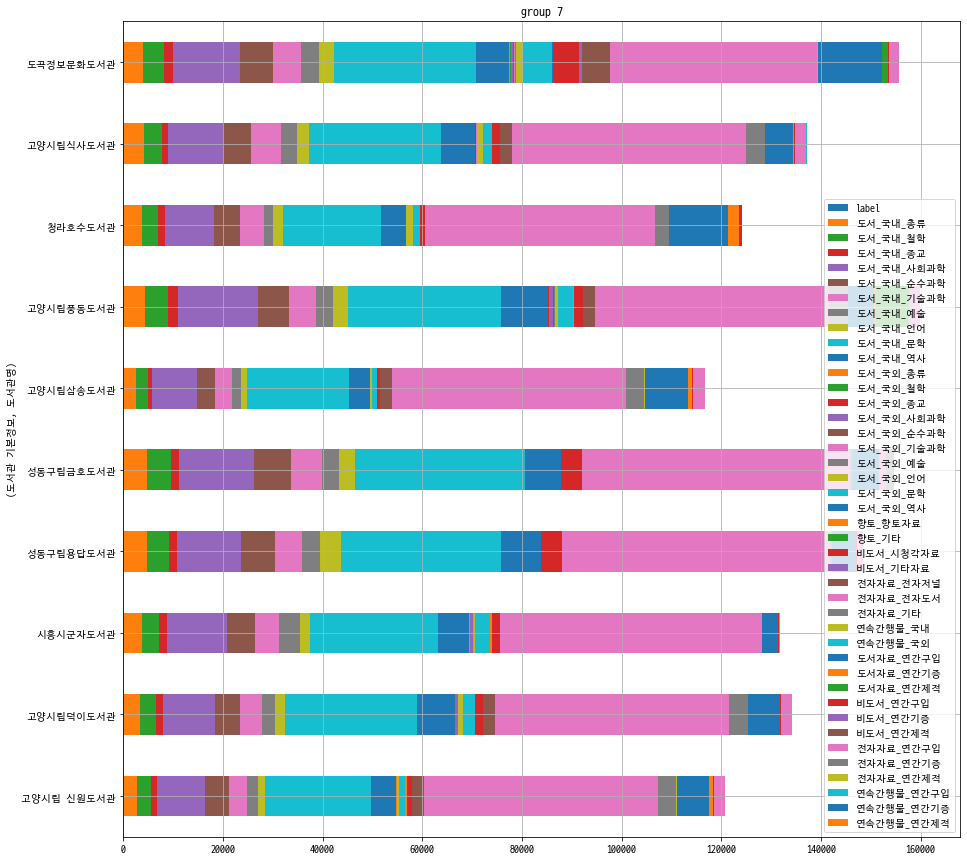

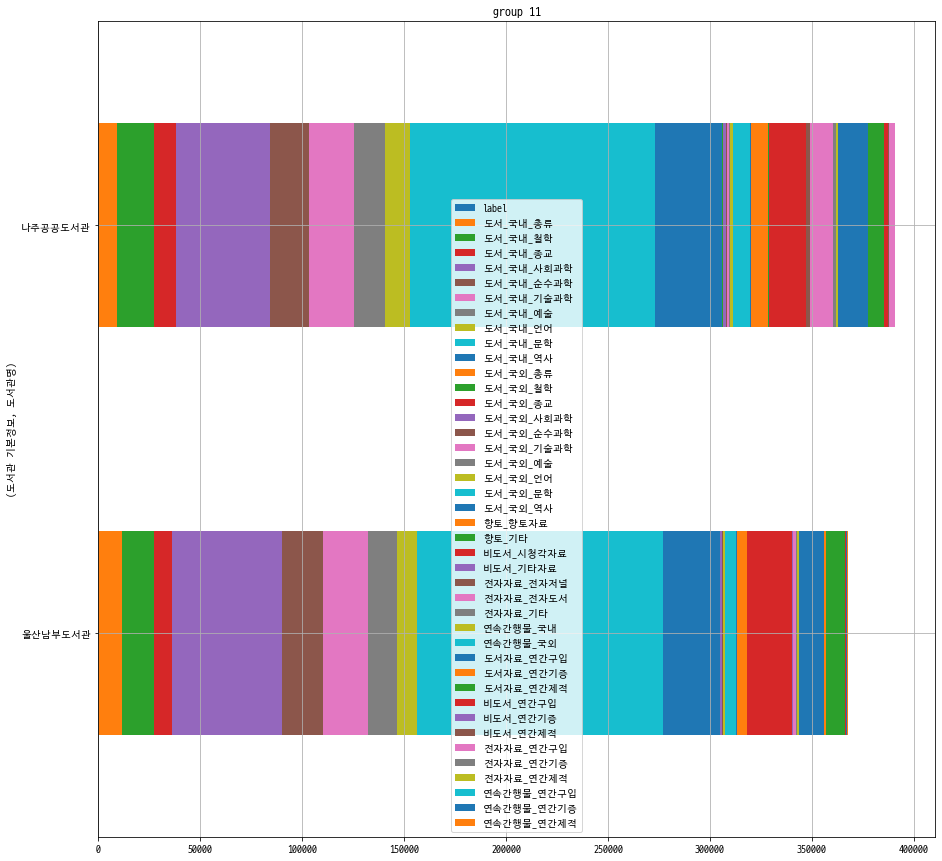

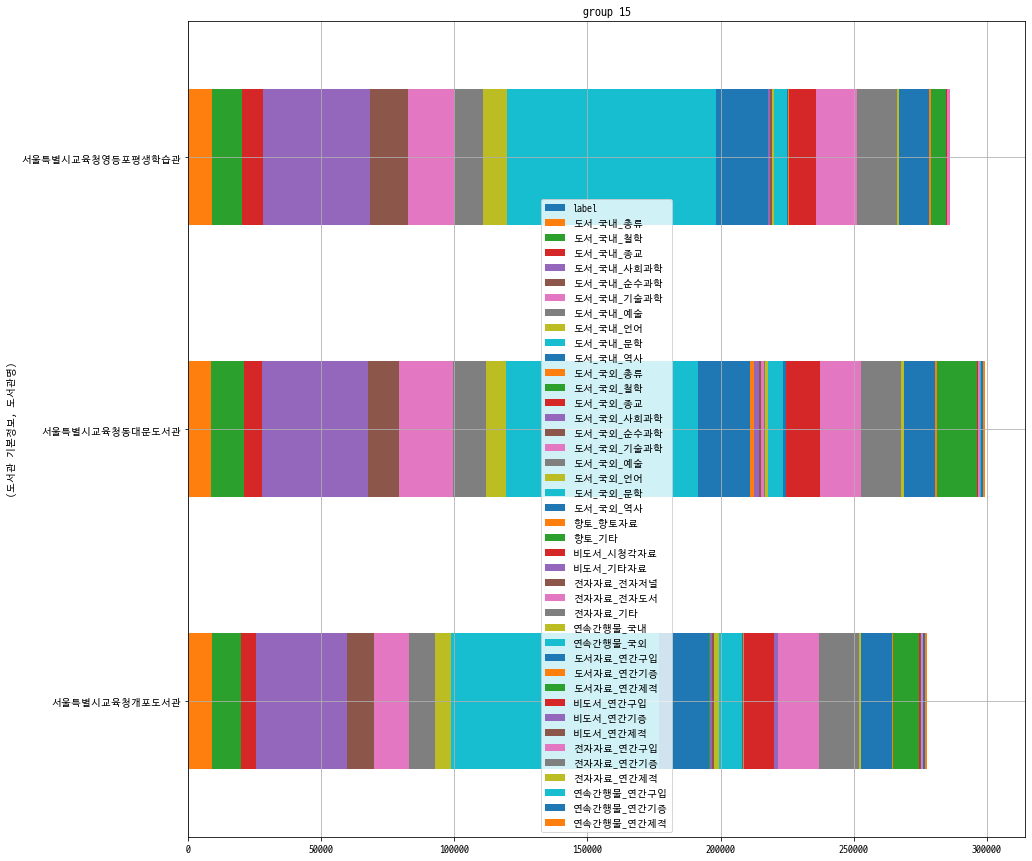

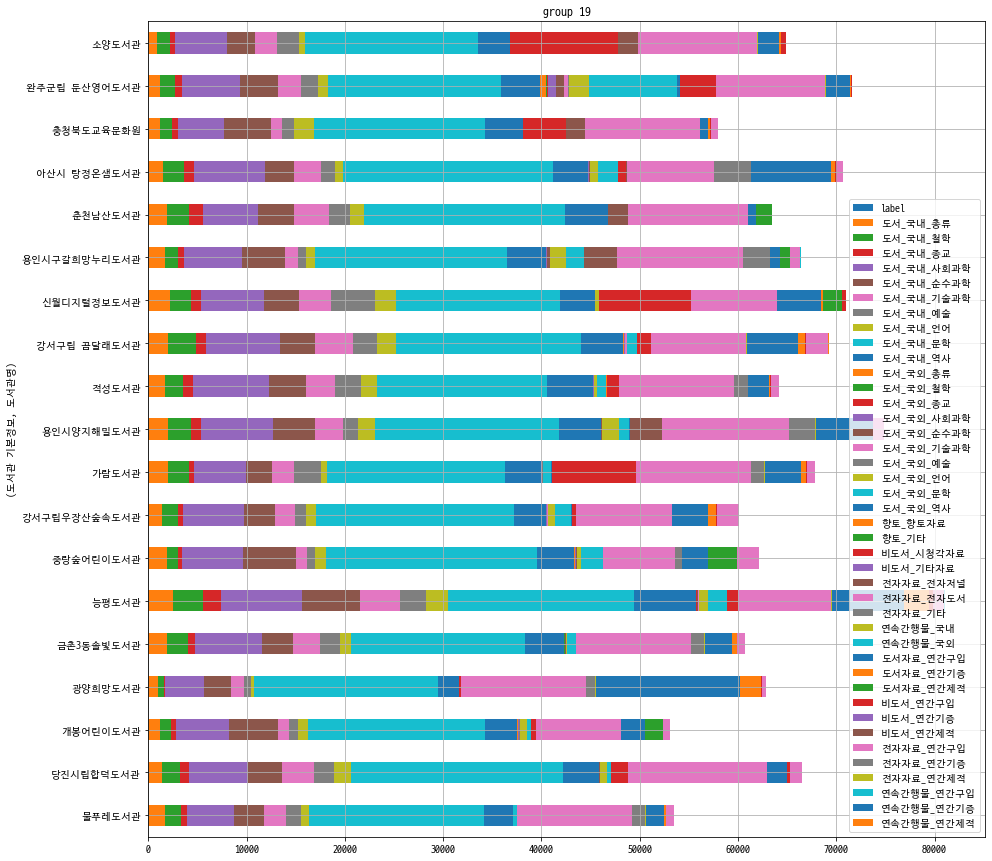

In [60]:
for i in range(3, 20, 4):
    group[group['label'] == i]           \
        .plot.barh(stacked=True, figsize=(15,15), grid=True, title='group %d'%i)

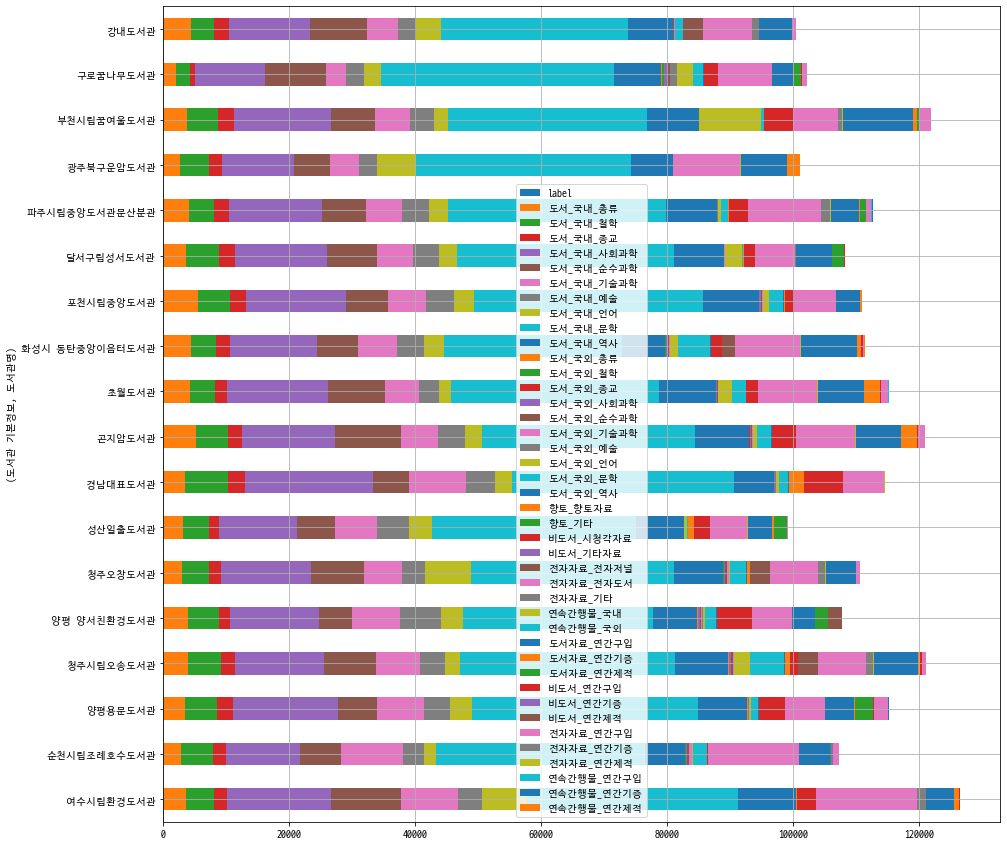

In [61]:
group[group['label'] == 55]           \
    .plot.barh(stacked=True, figsize=(15,15), grid=True)